**Showcase of Deep learning using TensorFlow**

- The goal is to train the model to predict a number by looking at handwritten digits images. 

#### Import & load mnist data

In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# load dataset of handwritten digits (0-9).
mnist = keras.datasets.mnist  

# split into testing and training
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

In [2]:
train_images.shape

(60000, 28, 28)

- This means 60k images that are made up of 28 width x 28 height pixels. 

In [3]:
train_images[0,27,27]

np.uint8(0)

- This means tht each image is black. 
- 0 = black
- 255 = white.

In [4]:
train_labels[:10] # Shows first 10 training labels 

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

- Each integers ranging from 0 - 15 corresponds with specific handwritten digits
    - (E.g) no.5 at index 0 means handwritten image 5
- This is how an image of 5 looks like as shown below:

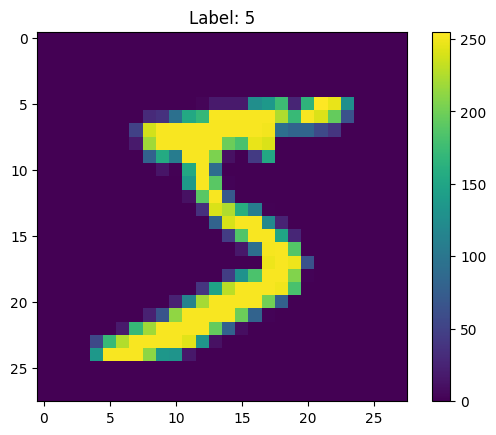

In [5]:
# Display the first image and its label (which is a 5 in this case)
plt.imshow(train_images[0]) # shows image of 5
plt.colorbar()
plt.title(f"Label: {train_labels[0]}")  # Should show 5 as label
plt.show()

- This means the first image is no. 5, and the prediction is 5.

#### Data Preprocessing

- Normalising the data helps to stabilize gradient updates during training. 
    - Gradient refers to changing the weights in order to reduce the loss of accuracy (so as to improve the model). 
    - Images prediction becomes more accurate. 
        - Gradient too high = model's weights changes too much, which causes the model to overshoot the optimal target accuracy.
        - Gradient too low = model's weight changes too slowly (undershoot target).
- Since our pixel value is already at 0, we do not need to scale our value to be between 0 and 1. But its a good habit to do it anyways (to make sure gradient is stable):

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

- Now our pixel values are truely between 0 and 1.

#### Building, Compelling & Training the model

- Keras **sequential** model represents a feed-forward neural netowrk where one passes values from left to right. 

In [7]:
# Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer - 784 neurons total. 
    keras.layers.Dense(128, activation='relu'),  # hidden layer - 128 learnt neurons 
    keras.layers.Dense(10, activation='softmax') # output layer - 10 neurons because we got 0 - 9 (10 numbers)
])

c:\Workflow\Python interpreter\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- **1st layer:** _Flatten layer_ reshape the shape (28, 28) array (28x28 image), into a 1D array of 784 elements (28 * 28 = 784).
    - This is important because the _Dense layer_ expects a 1D array as input.

- **2nd layer:** _Dense layer_ connects each neurons from previous layer to this layer.
    - Each of these 128 neurons (**learnt neurons**) will learn to capture different features or patterns of the input image data.
        - If learnt neurons are too high = model overfit.
        - If learn neurons are too low = model underfit.
    - `relu` means `ReLU(x)=max(0,x)`, where:
        - if input x is positive, ReLU(x) = x.
        - if input x is negative, ReLU(x) = 0.
    - The main purpose of this is to make gradient more stable. 
        - if we don't have `relu`, model trains with negative values (-5) which makes gradiant more unstable.

- **3rd layer:** This is _Output layer_ and _Dense layer_.
    - `softmax` will calculate probability distribution for each number so that this layer will be between 0 and 1, where 1 represents high probability of the image being that number. 

In [8]:
# Compile Model
model.compile(optimizer='adam', # Optimizer to minimize the loss (how to update its weights based on the data during training)
              loss='sparse_categorical_crossentropy', # How much the model's predictions differ from the actual labels
              metrics=['accuracy'])  # track accuracy

In [15]:
# Train Model
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!
# An epoch is one full iteration over the entire training dataset. 
# Each epoch will be different from previous epoch so as to match closely with the actual data. 

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.9992 - loss: 0.0030
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.9981 - loss: 0.0055
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.9993 - loss: 0.0025
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.9988 - loss: 0.0041
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.9989 - loss: 0.0039
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.9994 - loss: 0.0019
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.9987 - loss: 0.0041
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.9986 - loss: 0.0037
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.9992 - loss: 0.0023
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.9986 - loss: 0.0037


#### Evaluate / Test Model

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9787 - loss: 0.1463
Test accuracy: 0.9786999821662903


- Our model's accuracy is at 97.8%, when epoch = 10.

In [11]:
# Testing model Predictions on unseen data
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step


In [12]:
predictions[1] 

array([3.1296629e-25, 3.9056113e-17, 1.0000000e+00, 5.0172462e-14,
       9.8681743e-37, 8.5054725e-21, 2.3229139e-24, 4.3812286e-38,
       5.6105509e-20, 0.0000000e+00], dtype=float32)

In [13]:
# returns index of max value in the list 
np.argmax(predictions[1]) 

np.int64(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


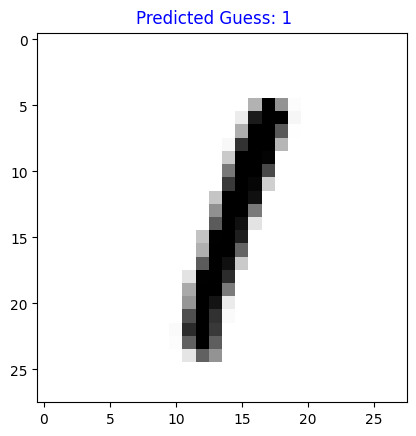

In [14]:
# Model's prediction on test data:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def predict(model, image, correct_label):
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.figtext(0.5, 0.90, f"Predicted Guess: {guess}", ha='center', fontsize=12, color='blue')
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


- As you can see, this has concluded our goal of training the model to predict handwritten digits with an accuracy of 97.8%